<a href="https://colab.research.google.com/github/ashnaeldho/Phase-1_Week4/blob/master/GRAD_CAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:

!ls "/content/drive/My Drive/cifar_images"

cifar_image10.jpg  cifar_image3.jpg  cifar_image6.jpg  cifar_image9.jpg
cifar_image1.jpg   cifar_image4.jpg  cifar_image7.jpg
cifar_image2.jpg   cifar_image5.jpg  cifar_image8.jpg


In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image

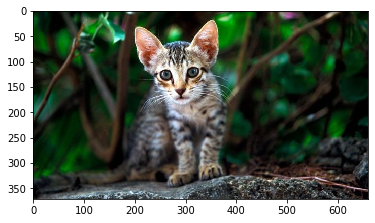

285
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


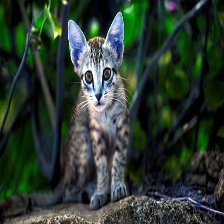

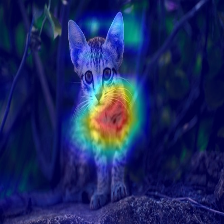

In [138]:
img = cv2.imread("cifar_image1.jpg")
cat=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(cat)
plt.show()
model = VGG16(weights="imagenet")
from skimage import io
cat = cv2.resize(cat, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(cat)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx) 
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape) 
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (cat.shape[1], cat.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(cat, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( cat)
cv2_imshow(superimposed_img)

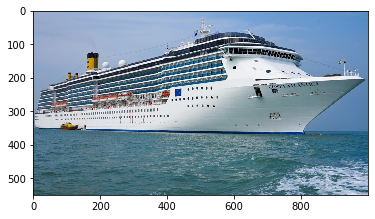

628
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


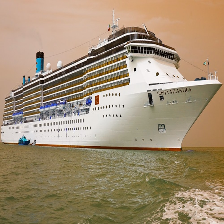

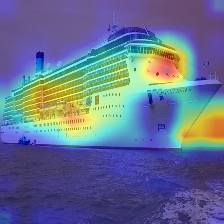

In [140]:
img = cv2.imread("cifar_image2.jpg")
ship=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(ship)
plt.show()
ship = cv2.resize(ship, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(ship)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx) 
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape) 
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (ship.shape[1], ship.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(ship, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( ship)
cv2_imshow(superimposed_img)

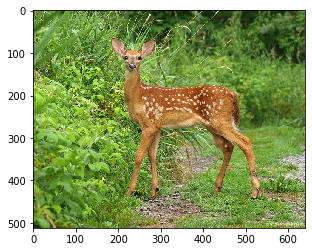

352
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


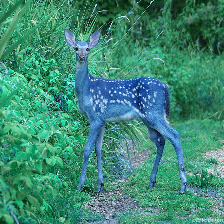

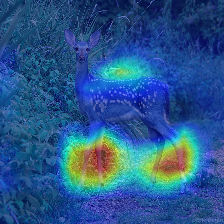

In [141]:
img = cv2.imread("cifar_image3.jpg")
deer=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(deer)
plt.show()

deer = cv2.resize(deer, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(deer)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)



class_idx = np.argmax(preds[0])
print(class_idx) 
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape) 
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (deer.shape[1], deer.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(deer, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( deer)
cv2_imshow(superimposed_img)

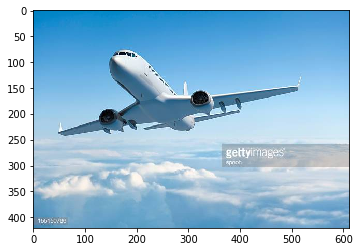

812
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


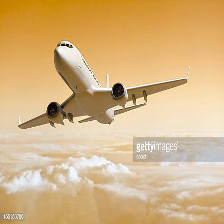

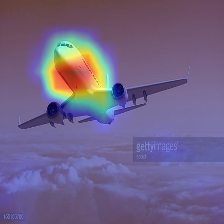

In [142]:
img = cv2.imread("cifar_image4.jpg")
airplane=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(airplane)
plt.show()


airplane = cv2.resize(airplane, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(airplane)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)



class_idx = np.argmax(preds[0])
print(class_idx) 
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape) 
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (airplane.shape[1], airplane.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(airplane, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( airplane)
cv2_imshow(superimposed_img)

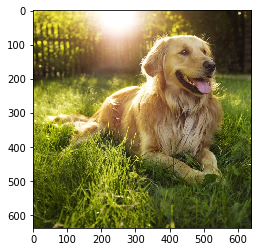

207
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


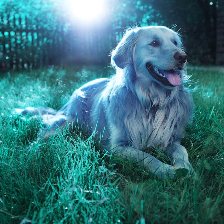

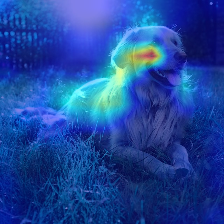

In [143]:
img = cv2.imread("cifar_image5.jpg")
dog=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(dog)
plt.show()


dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(dog)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)



class_idx = np.argmax(preds[0])
print(class_idx) 
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape) 
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( dog)
cv2_imshow(superimposed_img)

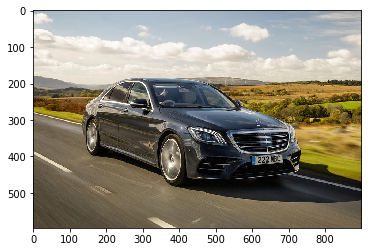

817
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


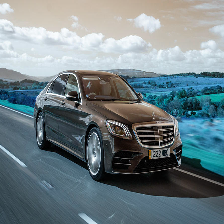

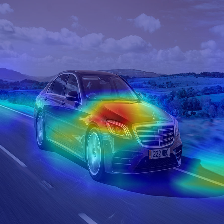

In [144]:
img = cv2.imread("cifar_image6.jpg")
automobile=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(automobile)
plt.show()


automobile = cv2.resize(automobile, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(automobile)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)



class_idx = np.argmax(preds[0])
print(class_idx) 
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape) 
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (automobile.shape[1], automobile.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(automobile, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow(automobile)
cv2_imshow(superimposed_img)

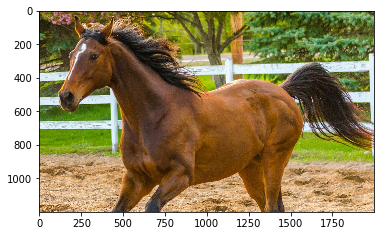

339
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


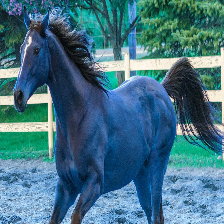

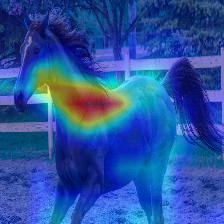

In [145]:
img = cv2.imread("cifar_image7.jpg")
horse=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(horse)
plt.show()


horse = cv2.resize(horse, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(horse)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)



class_idx = np.argmax(preds[0])
print(class_idx) 
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape) 
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (horse.shape[1], horse.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(horse, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( horse)
cv2_imshow(superimposed_img)

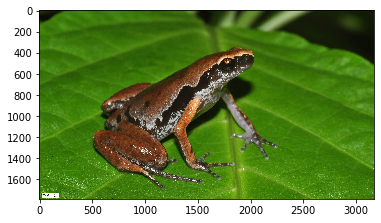

32
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


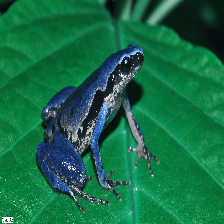

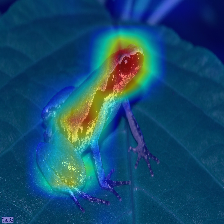

In [146]:
img = cv2.imread("cifar_image8.jpg")
frog=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(frog)
plt.show()


frog = cv2.resize(frog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(frog)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)



class_idx = np.argmax(preds[0])
print(class_idx) 
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape) 
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (frog.shape[1], frog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(frog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow(frog)
cv2_imshow(superimposed_img)

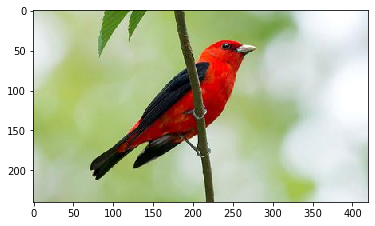

90
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


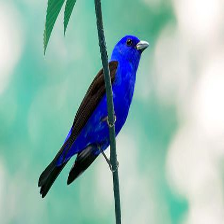

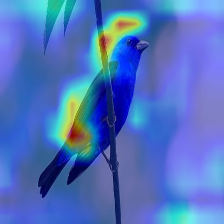

In [147]:
img = cv2.imread("cifar_image9.jpg")
bird=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(bird)
plt.show()


bird = cv2.resize(bird, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(bird)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)



class_idx = np.argmax(preds[0])
print(class_idx) 
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape) 
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (bird.shape[1], bird.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(bird, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow(bird)
cv2_imshow(superimposed_img)

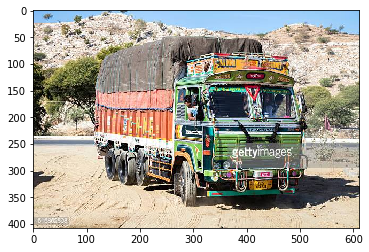

867
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


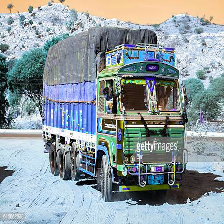

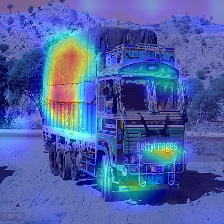

In [148]:
img = cv2.imread("cifar_image10.jpg")
truck=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(truck)
plt.show()


truck = cv2.resize(truck, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(truck)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)



class_idx = np.argmax(preds[0])
print(class_idx) 
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape) 
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (truck.shape[1], truck.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(truck, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow(truck)
cv2_imshow(superimposed_img)